# Problem Statement :

## The following data contains the attributes contributing to the dissolved oxygen level in River water. Create a model to predict the level of Oxygen dissolved in the River water

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
data = df.copy()
data.head()

,Id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,12.58,9.875,9.20,NaN,NaN,NaN,NaN,NaN,0.690,...,NaN,NaN,NaN,4.80,5.850,NaN,NaN,NaN,NaN,NaN
1,3,9.37,10.300,10.75,NaN,NaN,NaN,NaN,NaN,0.710,...,NaN,NaN,NaN,5.88,6.835,NaN,NaN,NaN,NaN,NaN
2,4,8.35,8.290,7.90,NaN,NaN,NaN,NaN,NaN,2.210,...,NaN,NaN,NaN,3.20,2.700,NaN,NaN,NaN,NaN,NaN
3,5,9.57,8.820,6.80,NaN,NaN,NaN,NaN,NaN,0.595,...,NaN,NaN,NaN,7.70,7.055,NaN,NaN,NaN,NaN,NaN
4,6,6.00,6.000,6.50,NaN,NaN,NaN,NaN,NaN,0.600,...,NaN,NaN,NaN,5.50,5.300,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(147, 37)

# Preprocessing

In [5]:
# Id = Unique Identifier
data.drop(['Id'], axis=1, inplace=True)

## Handling the NaN values

In [6]:
data.isnull().sum()

target      0
O2_1        2
O2_2        2
O2_3      115
O2_4      116
O2_5      114
O2_6      110
O2_7      110
NH4_1       2
NH4_2       2
NH4_3     115
NH4_4     116
NH4_5     114
NH4_6     110
NH4_7     110
NO2_1       2
NO2_2       2
NO2_3     115
NO2_4     116
NO2_5     114
NO2_6     110
NO2_7     110
NO3_1       2
NO3_2       2
NO3_3     115
NO3_4     116
NO3_5     114
NO3_6     110
NO3_7     110
BOD5_1      2
BOD5_2      2
BOD5_3    115
BOD5_4    116
BOD5_5    114
BOD5_6    110
BOD5_7    110
dtype: int64

### Dropping columns with more than 60% NaN values

In [7]:
(147 *60)/100

88.2

In [8]:
for col in data.columns :
    if data[col].isnull().sum() > 88 :
        data.drop([col], axis=1, inplace=True)

In [9]:
data.shape

(147, 11)

In [10]:
data.head()

,target,O2_1,O2_2,NH4_1,NH4_2,NO2_1,NO2_2,NO3_1,NO3_2,BOD5_1,BOD5_2
0,12.58,9.875,9.20,0.690,1.040,0.0940,0.0990,1.58,1.825,4.80,5.850
1,9.37,10.300,10.75,0.710,0.725,0.0585,0.0515,1.21,0.905,5.88,6.835
2,8.35,8.290,7.90,2.210,2.210,0.1000,0.1100,1.34,1.250,3.20,2.700
3,9.57,8.820,6.80,0.595,0.675,0.0460,0.0535,0.59,0.790,7.70,7.055
4,6.00,6.000,6.50,0.600,0.900,0.1800,0.3400,1.36,1.820,5.50,5.300


## Exploratory Data Analysis (EDA)

## Correlation Heatmap

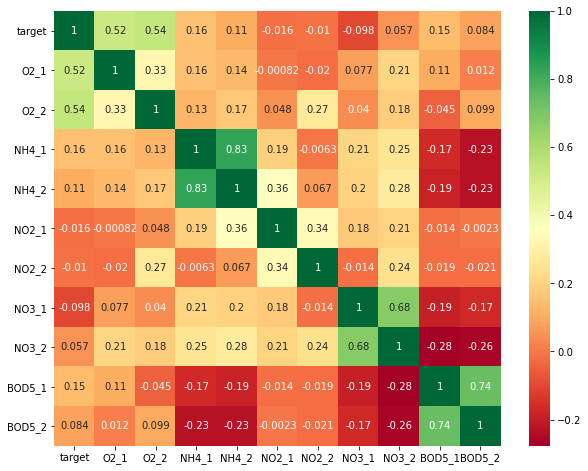

In [11]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### Correlated features :

1) BOD5_1 & BOD5_2 (0.74) : drop = BOD5_2(0.084 correlation with target) 

2) NO3_1 & NO3_2 (0.68) : drop = NO3_1(-0.098 correlation with target)

3) NH4_1 & NH4_2 (0.83) : drop = NH4_2(0.11 correlation with target)

In [12]:
data.drop(['BOD5_2', 'NO3_1', 'NH4_2'], axis=1, inplace=True)

In [13]:
data.head()

,target,O2_1,O2_2,NH4_1,NO2_1,NO2_2,NO3_2,BOD5_1
0,12.58,9.875,9.20,0.690,0.0940,0.0990,1.825,4.80
1,9.37,10.300,10.75,0.710,0.0585,0.0515,0.905,5.88
2,8.35,8.290,7.90,2.210,0.1000,0.1100,1.250,3.20
3,9.57,8.820,6.80,0.595,0.0460,0.0535,0.790,7.70
4,6.00,6.000,6.50,0.600,0.1800,0.3400,1.820,5.50


### Filling the NaN values of the important features with their respective mean values

In [14]:
data.isnull().sum()

target    0
O2_1      2
O2_2      2
NH4_1     2
NO2_1     2
NO2_2     2
NO3_2     2
BOD5_1    2
dtype: int64

In [15]:
for col in data.columns :
    if data[col].isnull().sum() > 0 :
        data[col].fillna(data[col].mean(), inplace=True)

In [16]:
data.isnull().sum()

target    0
O2_1      0
O2_2      0
NH4_1     0
NO2_1     0
NO2_2     0
NO3_2     0
BOD5_1    0
dtype: int64

### No null values left within the dataset

## Outliers

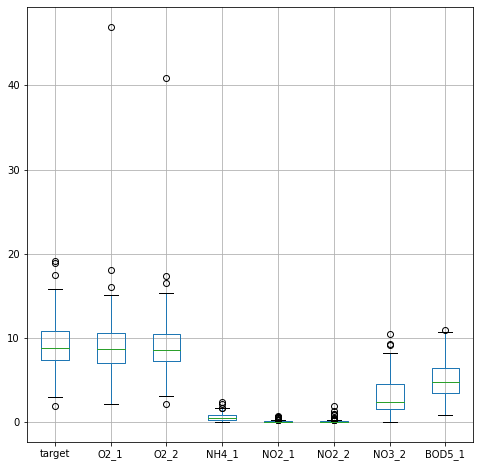

In [17]:
plt.figure(figsize=(8, 8))

data.boxplot()
plt.show()

## Features with outliers :

1) 'O2_1'

2) 'O2_2'

## 1) O2_1

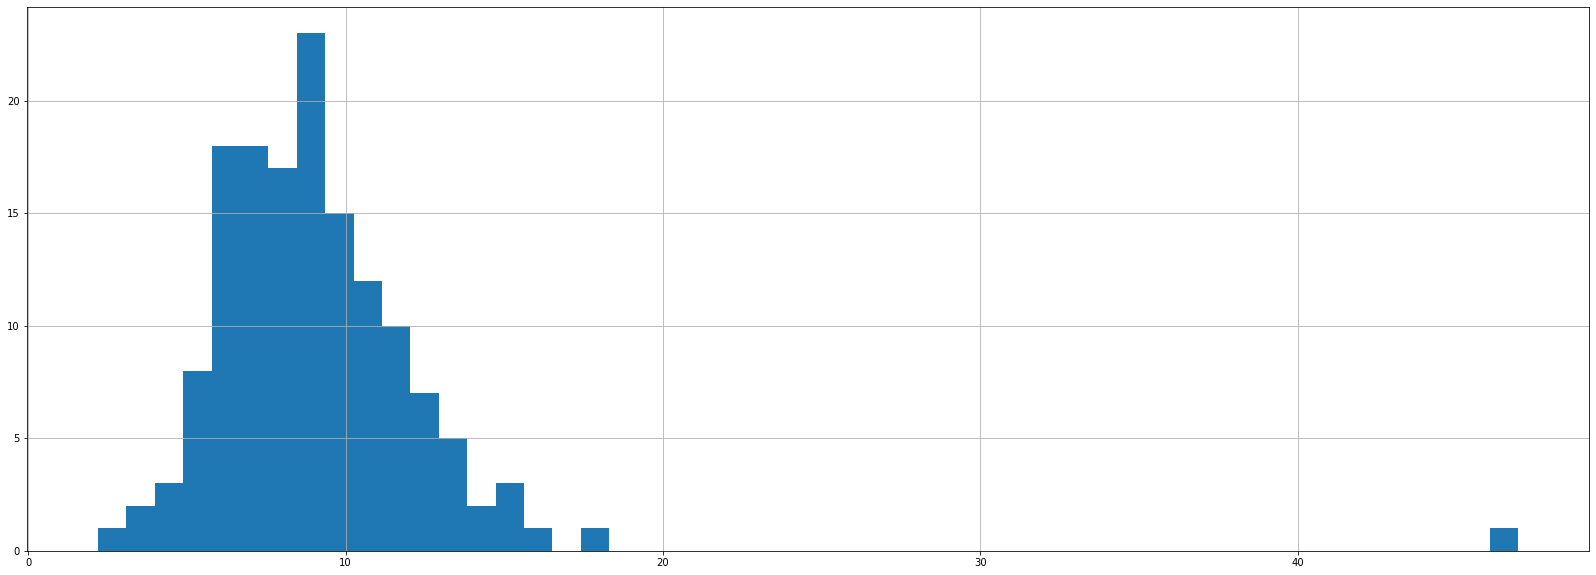

In [18]:
plt.figure(figsize=(28, 10))

data['O2_1'].hist(bins=50)
plt.show()

#### The feature 'O2_1' follows a Normal Distribution; hence we use *3 Sigma method* to handle the outliers

In [19]:
def handle_outliers(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    
    df.loc[df[variable] >= upper_boundary, variable] = upper_boundary

    df.loc[df[variable] <= lower_boundary, variable] = lower_boundary

In [20]:
handle_outliers(data, 'O2_1')

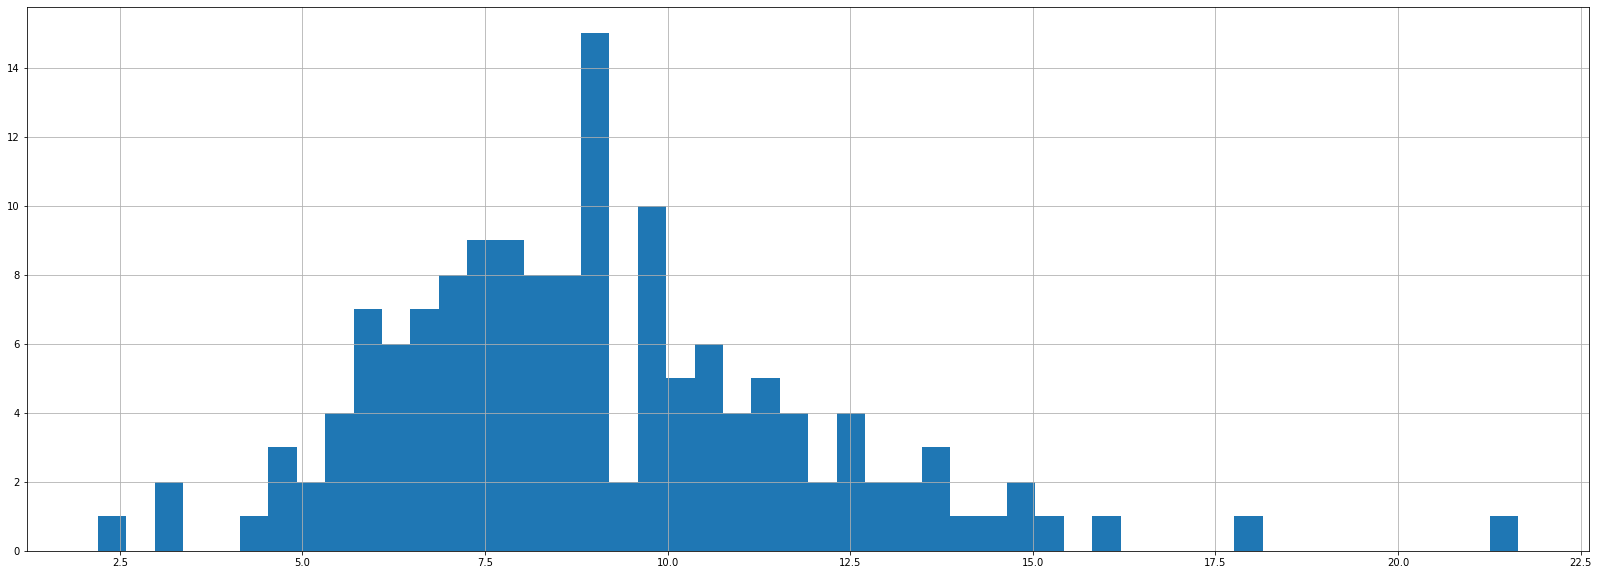

In [21]:
plt.figure(figsize=(28, 10))

data['O2_1'].hist(bins=50)
plt.show()

## 2) O2_2

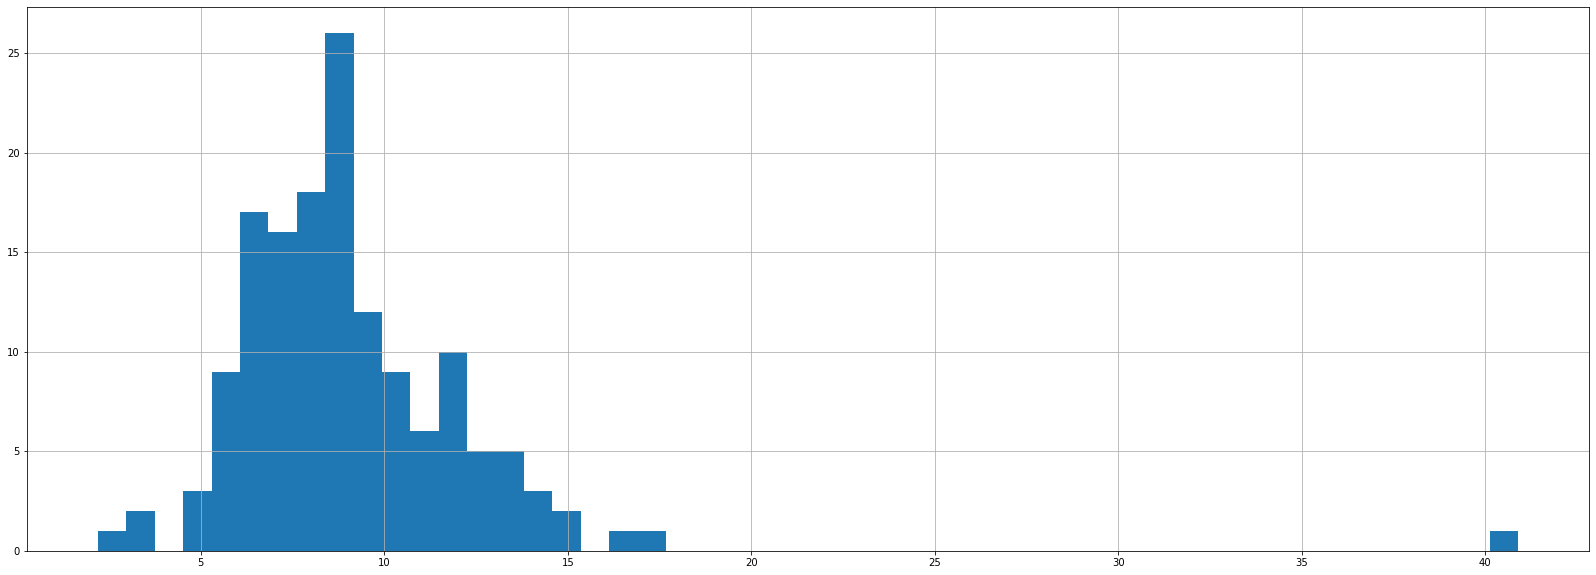

In [22]:
plt.figure(figsize=(28, 10))

data['O2_2'].hist(bins=50)
plt.show()

#### The feature 'O2_2' follows a Normal Distribution; hence we use *3 Sigma method* to handle the outliers

In [23]:
handle_outliers(data, 'O2_2')

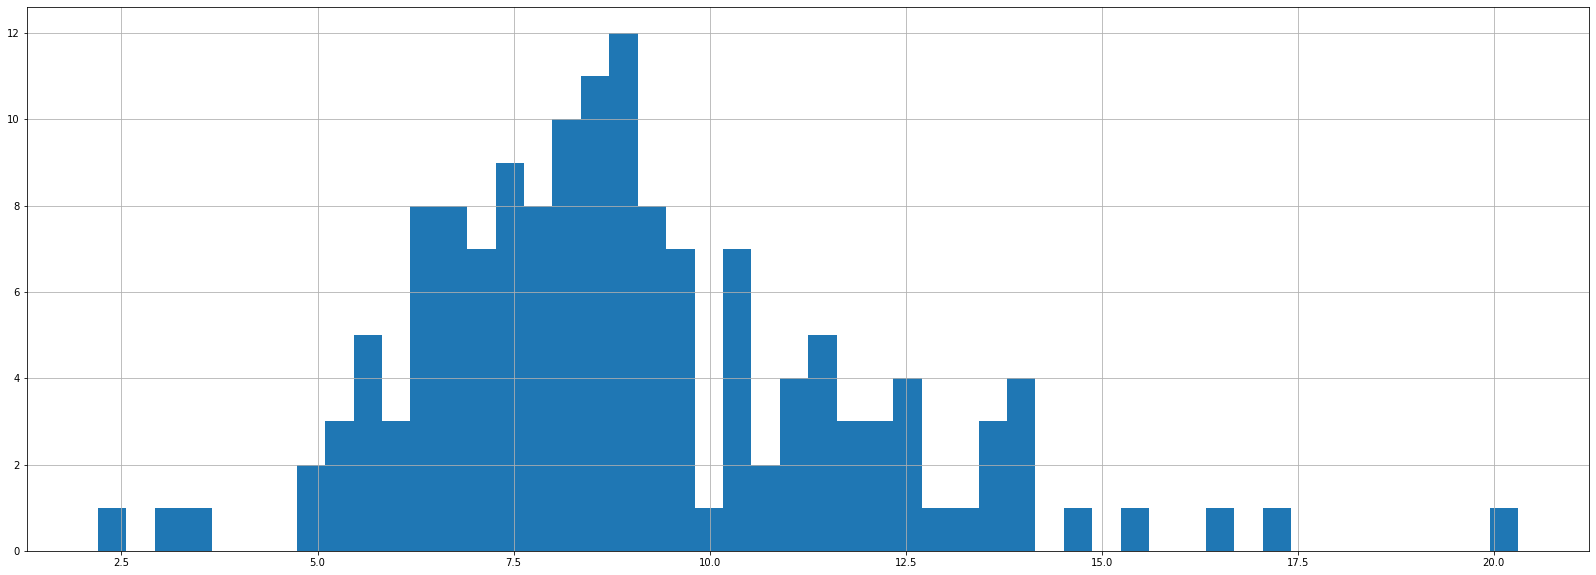

In [24]:
plt.figure(figsize=(28, 10))

data['O2_2'].hist(bins=50)
plt.show()

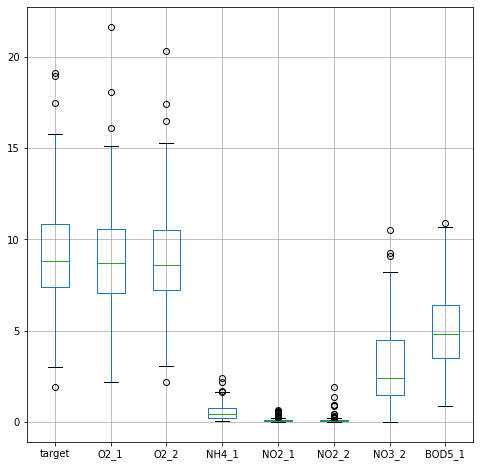

In [25]:
plt.figure(figsize=(8, 8))

data.boxplot()
plt.show()

## Part 1 

## Regression

## Train - Test Split

In [26]:
X = data.copy()
X.drop(['target'], axis=1, inplace=True)
X.head()

,O2_1,O2_2,NH4_1,NO2_1,NO2_2,NO3_2,BOD5_1
0,9.875,9.20,0.690,0.0940,0.0990,1.825,4.80
1,10.300,10.75,0.710,0.0585,0.0515,0.905,5.88
2,8.290,7.90,2.210,0.1000,0.1100,1.250,3.20
3,8.820,6.80,0.595,0.0460,0.0535,0.790,7.70
4,6.000,6.50,0.600,0.1800,0.3400,1.820,5.50


In [27]:
y = data['target']
y.head()

0    12.58
1     9.37
2     8.35
3     9.57
4     6.00
Name: target, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Feature Scaling : Standardizing

In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,O2_1,O2_2,NH4_1,NO2_1,NO2_2,NO3_2,BOD5_1
0,1.240684,2.071979,-1.049585,-0.177073,-0.235542,0.083796,-1.860018
1,1.441563,1.259471,0.258518,-0.357285,-0.279237,-0.948972,0.045792
2,0.103111,-0.812425,-0.044026,0.081541,-0.148153,-0.365233,0.020902
3,-0.928805,-1.137429,-0.246364,-0.654634,-0.414690,-1.146545,-0.559645
4,-0.004763,0.690715,2.002655,2.435995,-0.148153,2.059525,0.403789


In [32]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,O2_1,O2_2,NH4_1,NO2_1,NO2_2,NO3_2,BOD5_1
0,0.673355,0.662281,2.258448,-0.797769,-0.372795,-0.311232,-0.579246
1,0.756328,0.844947,-0.463301,1.412817,-0.240075,-0.845929,0.777531
2,-0.460618,-0.403270,-0.281851,0.678674,-0.151595,-0.467010,-0.645973
3,-0.751025,-0.829491,-0.695154,-0.504112,-0.372795,-0.424908,-0.690458
4,-0.792512,-1.149156,-0.362495,4.594104,3.564573,-0.104932,1.311346


## Training

## Linear Regression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
print('Linear Regression RSquared : ',lr.score(X_test, y_test))

Linear Regression RSquared :  0.5946012257477092


## Linear Regression with Ridge Regularization

In [36]:
ridge = Ridge()

In [37]:
ridge.fit(X_train, y_train)

Ridge()

In [38]:
print('Ridge Regression RSquared : ', ridge.score(X_test, y_test))

Ridge Regression RSquared :  0.5936184396011499


### Predicting exact values does not give us that good results as there is not enough correlation between the I/p & O/p features to predict the exact values of the O/p.

## So we try predicting whether Oxygen Level in River water is either High or Low

## Part 2

## Classification (Predicting High or Low)

In [39]:
y.head()

0    12.58
1     9.37
2     8.35
3     9.57
4     6.00
Name: target, dtype: float64

In [40]:
y.mean()

9.211496598639455

In [41]:
# qcut = quantile cut
y_new = pd.qcut(y, q=2, labels=[0, 1]) # Lower half = 0; Upper half = 1

In [42]:
y_new.head()

0    1
1    1
2    0
3    1
4    0
Name: target, dtype: category
Categories (2, int64): [0 < 1]

In [43]:
X.head()

,O2_1,O2_2,NH4_1,NO2_1,NO2_2,NO3_2,BOD5_1
0,9.875,9.20,0.690,0.0940,0.0990,1.825,4.80
1,10.300,10.75,0.710,0.0585,0.0515,0.905,5.88
2,8.290,7.90,2.210,0.1000,0.1100,1.250,3.20
3,8.820,6.80,0.595,0.0460,0.0535,0.790,7.70
4,6.000,6.50,0.600,0.1800,0.3400,1.820,5.50


##  No Feature Scaling is required while we are working with XGBoost ML model

## Training and Hyperparameter Tuning

In [44]:
xgboost = XGBClassifier()

In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [46]:
rs_cv = RandomizedSearchCV(xgboost, param_distributions=params, n_iter=5, n_jobs=1, cv=5)

In [47]:
rs_cv.fit(X, y_new)

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [48]:
rs_cv.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [49]:
rs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgboost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
score = cross_val_score(xgboost, X, y_new, cv=10)

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of 

[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [52]:
score

array([0.8       , 0.66666667, 0.86666667, 1.        , 0.73333333,
       0.8       , 0.73333333, 0.78571429, 0.64285714, 0.71428571])

In [53]:
score.mean()

0.7742857142857144

## Predicting High or Low gives better results